<a href="https://colab.research.google.com/github/SantiagoMorenoV/Position-vs-Salaries/blob/main/R/Pos_Salaries_Polynomial_Reg_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Did the interviewee tell the truth?**

An HR recruiter wants to know if a candidate told the truth or not about his salary in his previous position.

For this case, I have a dataset with the positions and salaries from the company where the candidate used to work.

# **Importing the dataset**

In [ ]:
dataset = read.csv('https://raw.githubusercontent.com/SantiagoMorenoV/Position-vs-Salaries/main/Position_Salaries.csv')
dataset
dataset = dataset[2:3]
dataset

Position,Level,Salary
<chr>,<int>,<int>
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


Level,Salary
<int>,<int>
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000


With dataset = dataset[2:3], I keep the second and third columns, which are the columns that I will use in the model.

# **Plotting Data to see if it is linear or maybe it is more like a polynomial**

There are two ways of plotting Salary vs Position. With the library ggplot and by using the R's function "plot()" to create a scatter plot.

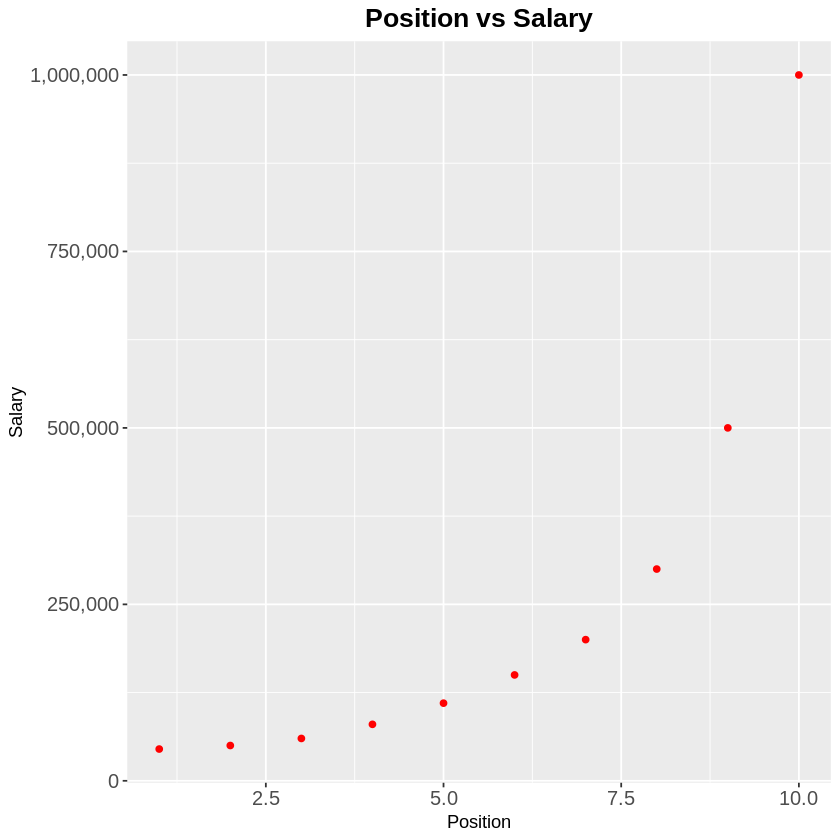

In [ ]:
library(ggplot2)
library(scales)
ggplot(data = dataset, aes(x = Level, y = Salary)) +
  geom_point(color = "red") +
  labs(x = "Position", y = "Salary", title = "Position vs Salary") +
  theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)) +
  scale_y_continuous(labels = comma)

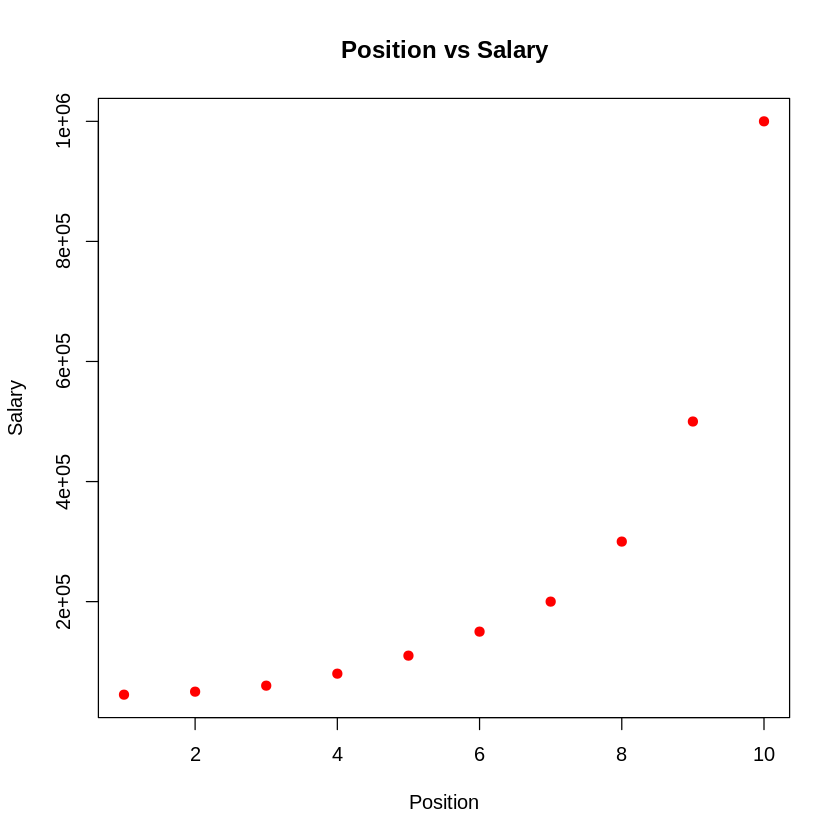

In [ ]:
plot(dataset$Level, dataset$Salary, col = "red", pch = 19,
     xlab = "Position", ylab = "Salary", main = "Position vs Salary")

# **Descriptive Statistics**

In [ ]:
summary(dataset)

     Level           Salary       
 Min.   : 1.00   Min.   :  45000  
 1st Qu.: 3.25   1st Qu.:  65000  
 Median : 5.50   Median : 130000  
 Mean   : 5.50   Mean   : 249500  
 3rd Qu.: 7.75   3rd Qu.: 275000  
 Max.   :10.00   Max.   :1000000  

# **Salary distribution**

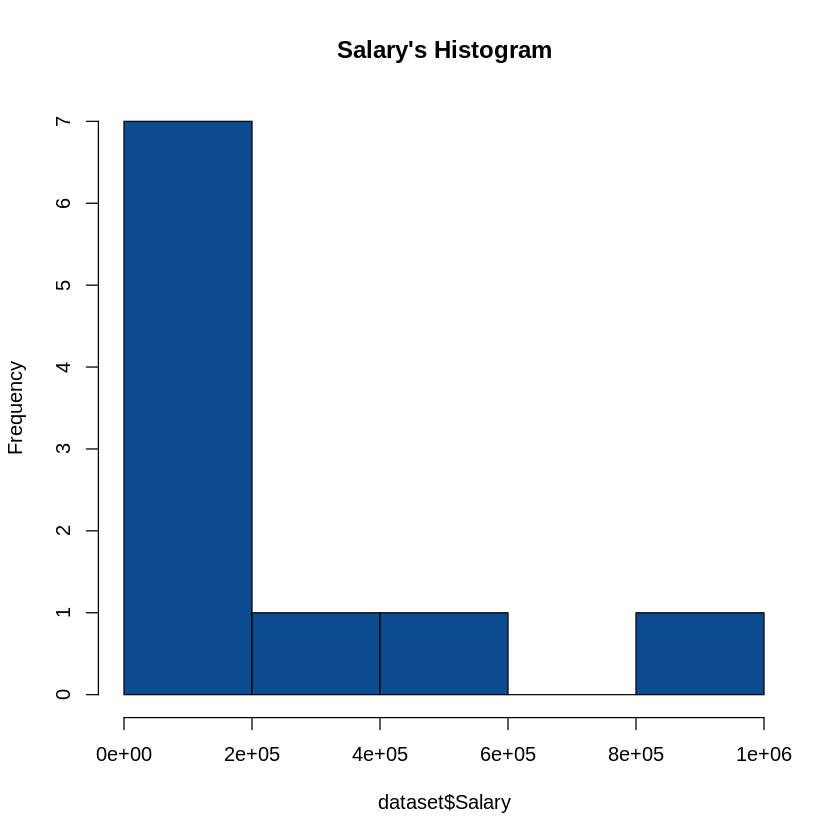

In [ ]:
hist(dataset$Salary, main ="Salary's Histogram", col= '#0E4C92')

# **Boxplot**

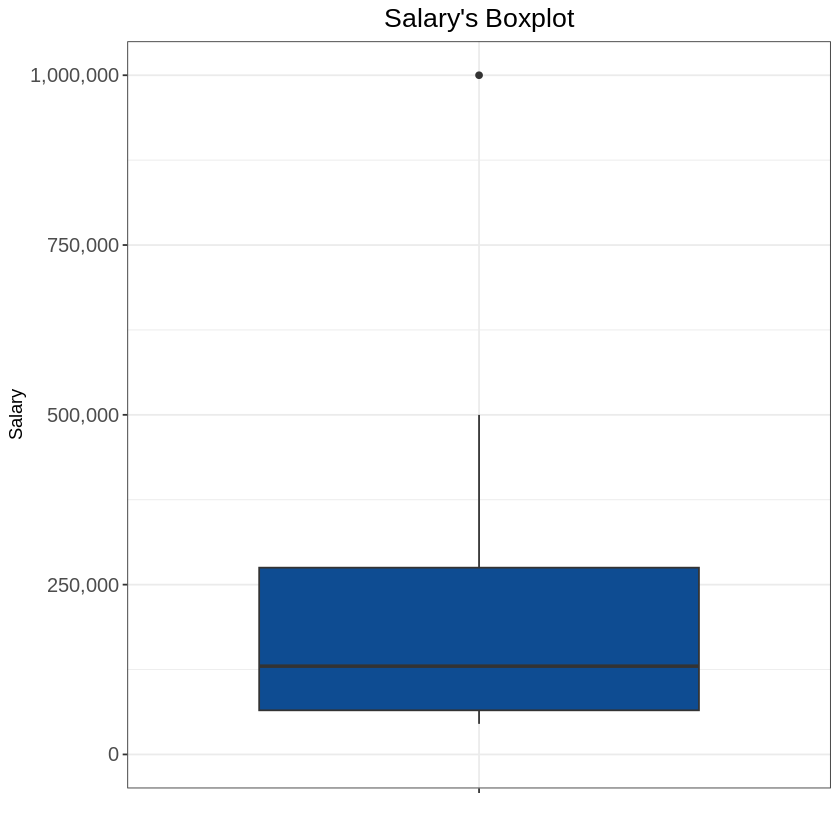

In [ ]:
#install.packages("ggplot2")
library(ggplot2)
library(scales)
variables <- c("Salary")
for (var in variables) {
  print(ggplot(data = dataset, aes(x = "", y = dataset[,var])) +
    geom_boxplot(fill = "#0E4C92") +
    labs(x = "", y = var, title = paste0(var, "'s Boxplot")) +
    scale_y_continuous(labels = comma, limits = c(0, max(dataset[,var]))) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 16),
          axis.text.y = element_text(size = 12)))
}

# **Linear or Polynomial Regression?**

For academic purposes, I will estimate a linear and a polynomial model to check which of these two would be a better fit for the data.

# **Fitting a Linear Regression to the dataset**

In [ ]:
lin_reg = lm(formula = Salary ~ .,
             data = dataset)

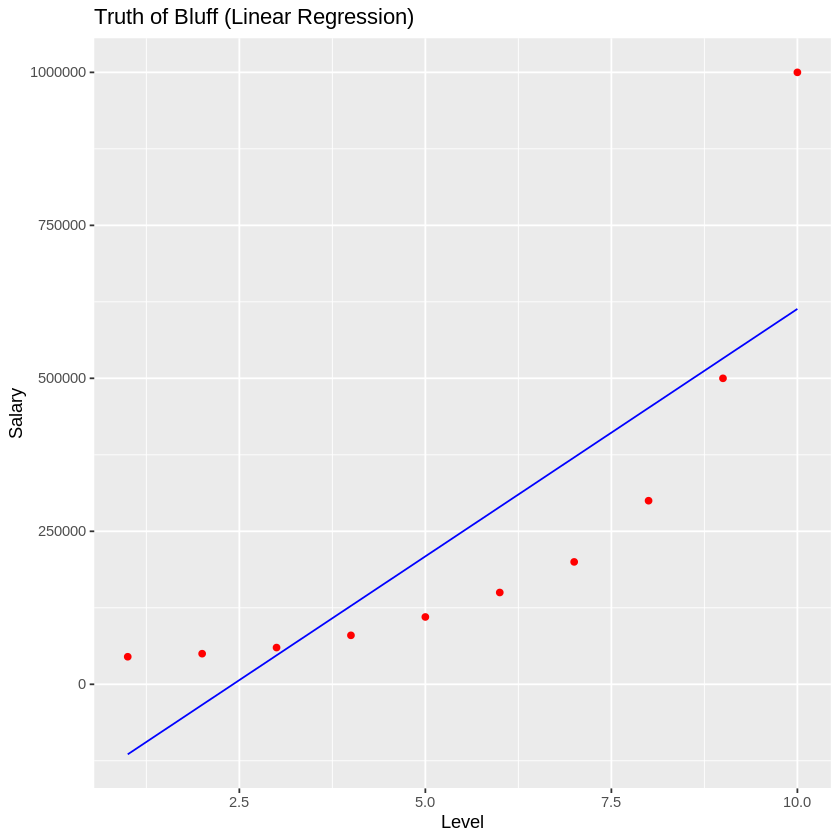

In [ ]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level , y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level , y = predict(lin_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth of Bluff (Linear Regression)') +
  xlab('Level') +
  ylab('Salary')

Since the data looks more like a polynomial, a linear model would not be accurate for this problem, as many actual data points are far from the linear regression predictions.

# **Fitting Polynomial Regression to the dataset**

In [ ]:
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

# **Visualising the Polynomial Regression results**

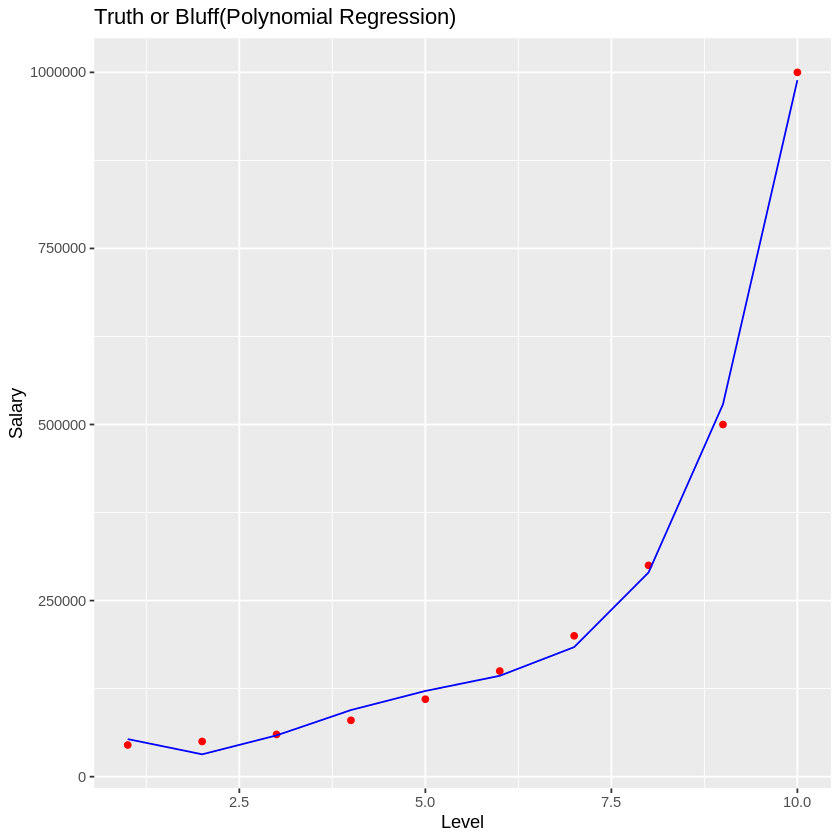

In [ ]:
ggplot() +
  geom_point(aes(x = dataset$Level , y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level , y = predict(poly_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff(Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

You must be wondering why there is some overfitting here. Remember that our business problem requires us to obtain the closest prediction. Thus, the candidate was right about his salary expectations or not, provided that he was a regional manager in his previous company and had been working in that position for two years, so he was in the range of 6th to 7th position level.

# **Visualizing the Polynomial Regression Results (for higher resolution and smoother curve)**

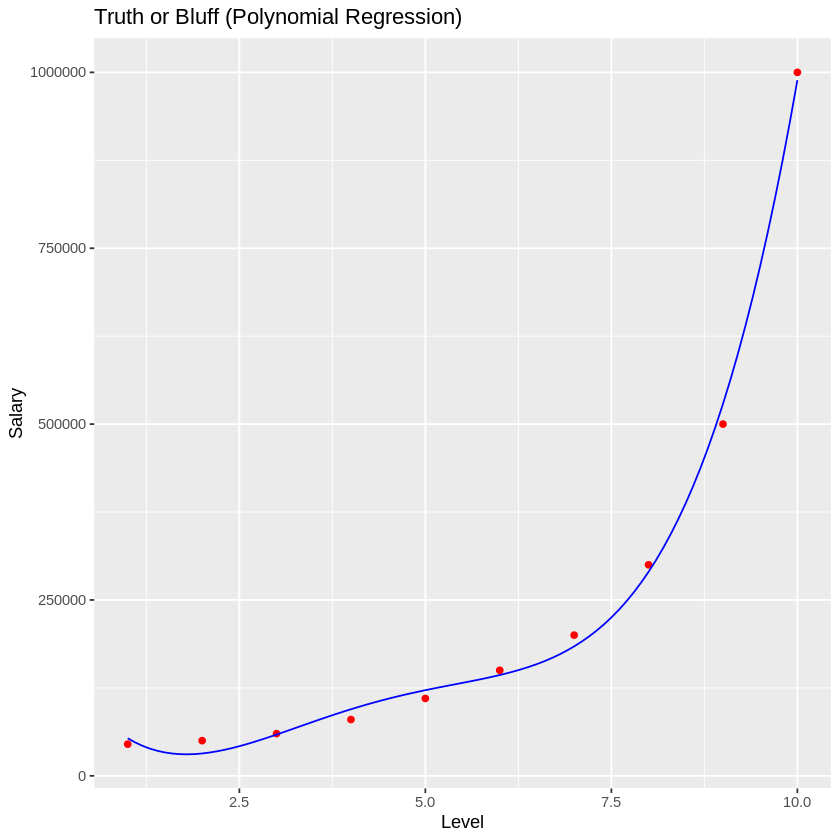

In [ ]:
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(poly_reg,
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

### **Predicting a new resut with Linear Regression**

In [ ]:
y_pred_lr = predict(lin_reg, data.frame(Level = 6.5))
y_pred_lr

1 
330378.8

### **Predicting the salary with a Polynomial Regression**

In [ ]:
y_pred_poly = predict(poly_reg, data.frame(Level = 6.5,
                             Level2 = 6.5^2,
                             Level3 = 6.5^3,
                             Level4 = 6.5^4))
y_pred_poly

1 
158862.5

# **Comparing both predictions**

Here I have compared both estimations by using a table. Firstly, I created a dictionary that includes the Polynomial and Linear regression predictions. Then I converted both predictions to decimals so the table is later displayed with two decimals (this is optional). After that, I implemented a pandas data frame and, finally, printed the comparative table. 

In [92]:
# Creating vectors with both models' names and their predictions  
models <- c("Linear Regression", "Polynomial Regression")
predictions <- c(y_pred_poly, y_pred_lr)
# Creating a table, with a matrix, with both models' names and their predictions
#pred_table <- data.frame(Model = models, Prediction = predictions)
pred_table <- matrix(predictions, ncol = 2)
colnames(pred_table) <- models
#Showing the table
pred_table

Linear Regression,Polynomial Regression
158862.5,330378.8


**Note:** it is up to you if you decide to use "`pred_table <- data.frame(Model = models, Prediction = predictions)`". If you implement it, the table will display like the transposed version of the one you see above, and you will not need to use "`colnames()`."

# **Discussion**

For this business problem, a Polynomial Regression is more accurate than a Linear one. 

Once evaluated that the previous position of the candidate was Regional Manager, he had been working in that role for two years, and also that once gotten data from the previous company, it was possible to classify him as an intermediate-level in the 6-7 range or between Regional Manager and Partner. In other words, a 6.5 position level.

The Polynomial model predicted that this candidate had a salary of USD 158,862.45, close to his answer, USD 160K per year. In conclusion, the statistical evidence showed that he was telling the truth.